# Simple Neural Network

We implement a simple neural network consisting of a single perceptron as presented in lecture 2.
Our network will learn to compute the sum of two numbers.

$y = x_1 + x_2$ and $\hat{y} = x_1w_1 + x_2w_2$

No PyTorch allowed 😏

##### Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
from pprint import pprint

np.random.seed(42)
rng = np.random.default_rng()

##### Generate training data set
My training set will include both random positive and negative integers as well as floats sampled from a uniform distribution.

In [2]:
def generate_training_set(rng: np.random.Generator, n: int):
    x = rng.integers(-100, 100, size=(n, 2))
    y = np.sum(x, axis=1)
    return x, y

##### Define the SimplePerceptron Class
The weight updating is implemented with gradient descent

In [3]:
class SimplePerceptron:
    def __init__(self, rng: np.random.Generator) -> None:
        self.rng = rng
        self.w = None
        self.losses = []
        self.weights = []
        
    def calc_loss(self, y, y_hat):
        return 1/2 * (y_hat - y) ** 2

    def forward(self, x):
        return np.dot(x, self.w)

    def init_weights(self, n: int):
        self.w = self.rng.normal(0, 1, size=(n,))

    def update_weights(self, x, y, y_hat):
        self.w = self.w - self.lr * (y_hat - y) * x
        return self.w
    
    def train(self, x_train, y_train, lr, epochs, stopping_criteria):
        self.lr = lr
        self.init_weights(x_train.shape[1])
        self.weights.append(self.w)
        self.training_stats = {
            "epoch": 0, 
            "loss": None, 
            "forward_passes": 0, 
            "lr": lr, 
            "stopped_early": False, 
            "training_size": x_train.shape[0]
            }
        self.losses = []
        
        for epoch, i in product(range(epochs), range(x_train.shape[0])):
            self.training_stats["epoch"] = epoch
            self.training_stats["forward_passes"] += 1
            
            # sample a single training sample
            j = self.rng.integers(0, x_train.shape[0])
            x, y = x_train[j], y_train[j]
            
            y_hat = self.forward(x)
            
            self.update_weights(x, y, y_hat)
            self.weights.append(self.w)
            
            loss = self.calc_loss(y, y_hat)
            self.losses.append(loss)
            
            if loss < stopping_criteria:
                # TODO rolling average or wair for the epoch to be < criteria
                self.training_stats["stopped_early"] = True
                self.training_stats["loss"] = loss
                return self.w, self.losses, self.weights
        self.training_stats["loss"] = loss
        return self.w, self.losses, self.weights
    
    def predict(self, x):
        return self.forward(x)

    def plot_weights(self):
        fig = plt.figure(dpi=42)
        plt.plot(self.weights)
        plt.xlabel("Training Samples")
        plt.ylabel("Weight")
        plt.title(f"Weight evolution over forward passes. Learning rate: {self.lr}")
        fig.show()
        
    def plot_losses(self):
        fig = plt.figure(dpi=42)
        plt.plot(self.losses)
        plt.xlabel("Training Samples")
        plt.ylabel("Training Loss")
        plt.title(f"Training Loss evolution over forward passes. Learning rate: {self.lr}")
        fig.show()

The following code tackles the exercise regarding different learning rates. 
It will plot weights and training losses over epochs.
Also a statement is printed if the training is stopped due to the stopping criteria.

C:\Users\rosen\AppData\Local\Temp\ipykernel_8872\716216365.py:68: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\rosen\AppData\Local\Temp\ipykernel_8872\716216365.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\rosen\AppData\Local\Temp\ipykernel_8872\716216365.py:9: RuntimeWarning: overflow encountered in scalar power
  return 1/2 * (y_hat - y) ** 2
C:\Users\rosen\AppData\Local\Temp\ipykernel_8872\716216365.py:18: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - self.lr * (y_hat - y) * x


,0,0,0,0,0,0,0,0,0
epoch,5,0,0,0,0,0,9,9,9
loss,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
forward_passes,594,565,611,71,93,53,1000,10000,100000
lr,0.00001,0.00001,0.00001,0.0001,0.0001,0.0001,0.001,0.001,0.001
stopped_early,True,True,True,True,True,True,False,False,False
training_size,100,1000,10000,100,1000,10000,100,1000,10000


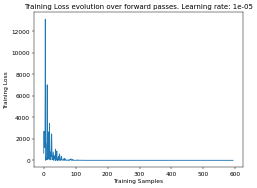

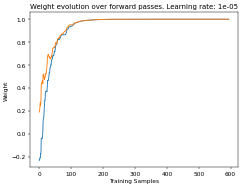

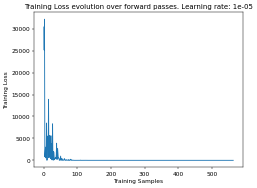

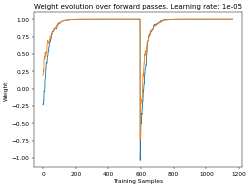

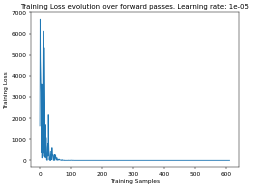

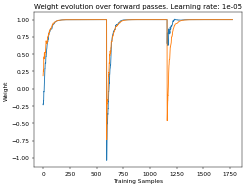

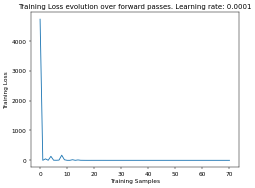

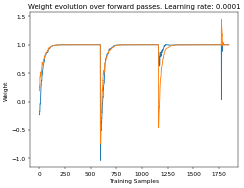

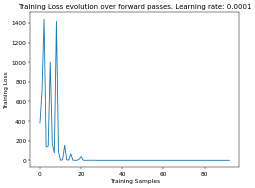

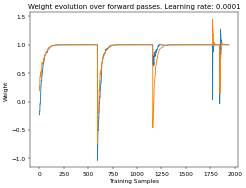

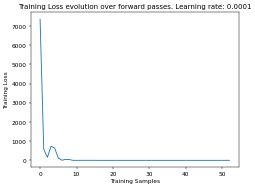

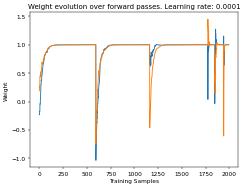

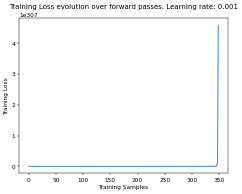

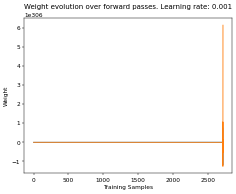

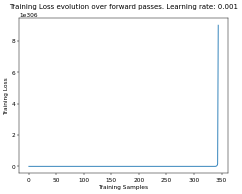

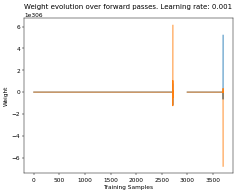

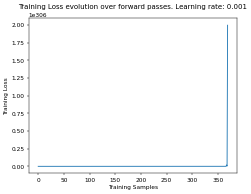

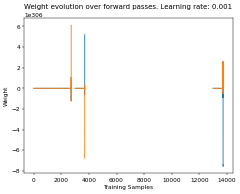

In [4]:
network = SimplePerceptron(rng)
learning_rates = [0.00001, 0.0001, 0.001]
training_sizes = [100, 1000, 10000]
epochs = 10
stopping_criteria = 1e-16
training_stats = []
# dict to dataframe
# df_training_stats = pd.DataFrame.from_dict(network.training_stats, orient="index")
for lr, training_size in product(learning_rates, training_sizes):
    x_train, y_train = generate_training_set(rng, training_size)
    network.train(x_train, y_train, lr, epochs, stopping_criteria)
    training_stats.append(pd.DataFrame.from_dict(network.training_stats, orient="index"))
    # pprint(network.training_stats)
    network.plot_losses()
    network.plot_weights()
    
df_training_stats = pd.concat(training_stats, axis=1)
df_training_stats

With the learning rate experiment we come to the conclusion, that lr must be even smaller if the training data set gets larger. When 0.00001 and 0.0001 work fine, the training fails to converge for larger lr's.


The next code snippet initializes several times with different seeds for the weights. Therefore, the weights are randomly choosen. Let's plot the weights for all tries.

Text(0.5, 1.0, 'Weight evolution over forward passes for different initialization seeds. Learning rate: 1e-05')

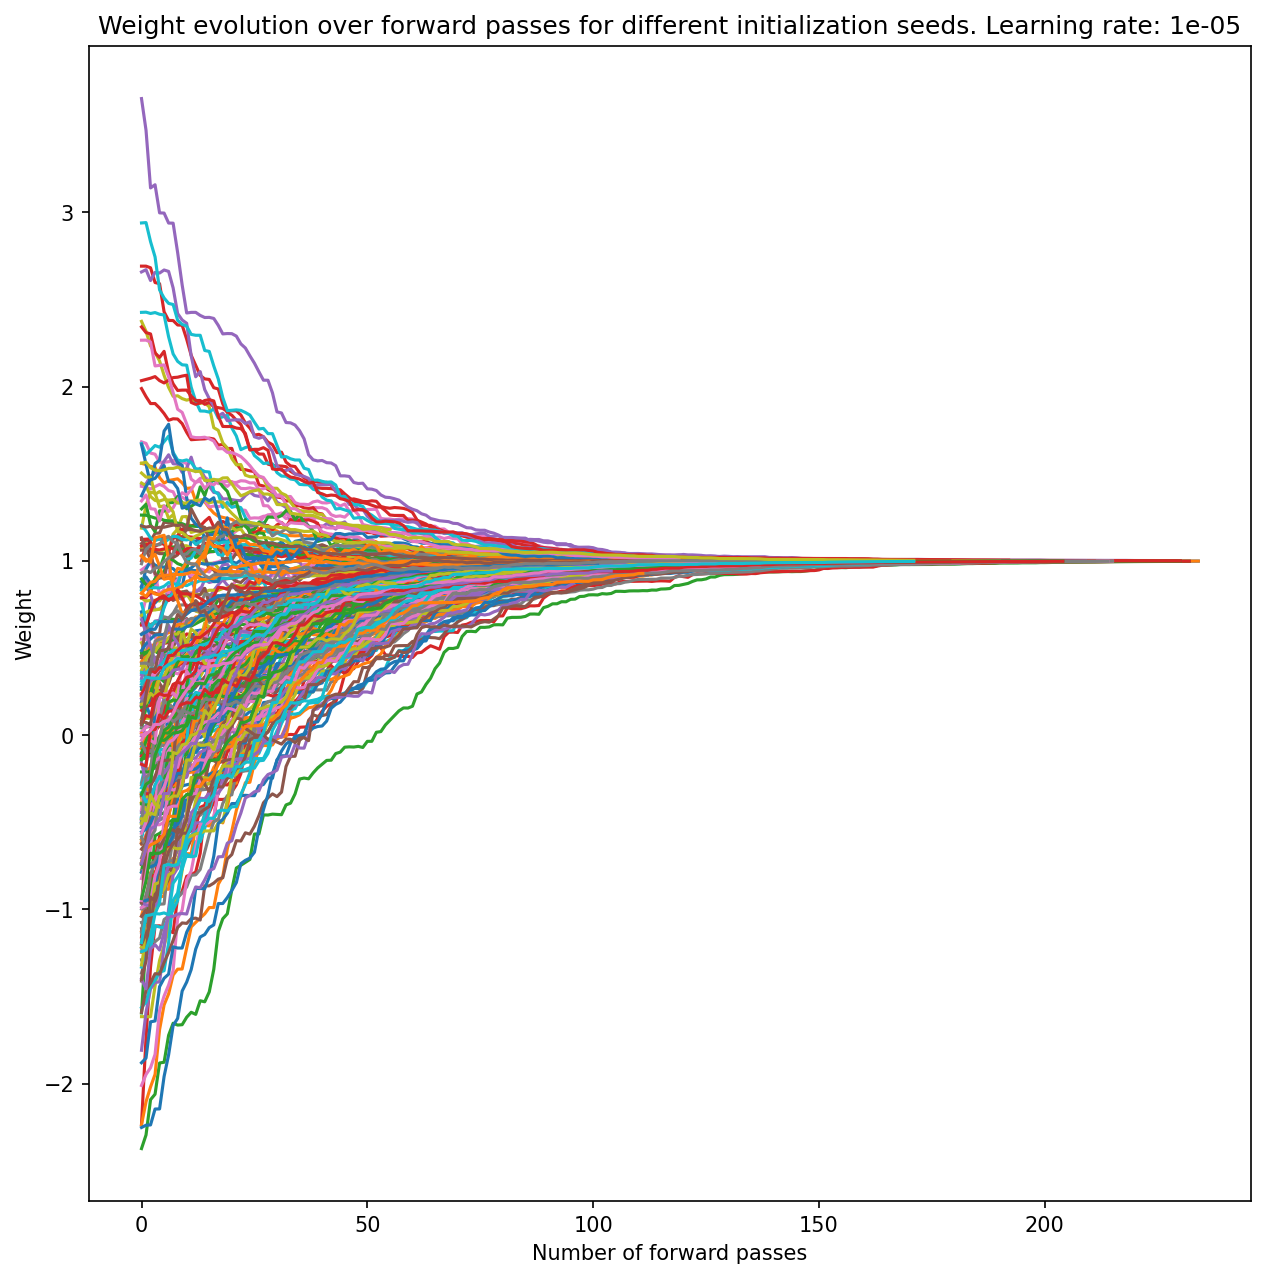

In [5]:
learning_rate = 0.00001
all_weights = []
fig = plt.figure(dpi=150, figsize=(10, 10))
for seed in range(100):
    np.random.seed(seed)
    network = SimplePerceptron(np.random.default_rng())
    w, losses, weights = network.train(x_train, y_train, learning_rate, 100, 0.0001)
    plt.plot(weights)
    
plt.xlabel("Number of forward passes")
plt.ylabel("Weight")
plt.title(f"Weight evolution over forward passes for different initialization seeds. Learning rate: {learning_rate}")

# Übungsblatt 3
Now we test our simple network to take in n input samples. The sum y is computed of a subset of m values of the inputs. It has to learn to ignore the other values.

And after thinking about it, I already had the solution implemented and just have to update my generator function!

In [6]:
np.random.seed(42)

def generate_extended_training_set(rng: np.random.Generator, size: int, n: int, m: int):
    x = rng.integers(-100, 100, size=(size, n))
    y = np.sum(x[:, :m], axis=1)
    return x, y

x_train, y_train = generate_extended_training_set(rng, 100, 5, 4)

Lets define a grid of parameters:

In [7]:
np.random.seed(42)
rng = np.random.default_rng()
network = SimplePerceptron(rng)
training_sizes = [1000]
epochs = 10
stopping_criteria = 1e-16

We will start with variable learning rate and fixed n, m:

In [8]:
training_stats = []

learning_rates = [0.000001, 0.00001, 0.0001, 0.001]
# learning rate variable, n & m fixed
for lr in learning_rates:
    network = SimplePerceptron(rng)
    x_train, y_train = generate_extended_training_set(rng, 10000, 10, 4)
    network.train(x_train, y_train, lr, epochs, stopping_criteria)
    training_stats.append(pd.DataFrame.from_dict(network.training_stats, orient="index"))
    print(network.weights[-1])
lr_fixed = pd.concat(training_stats, axis=1)
lr_fixed

[ 9.99999966e-01  9.99999980e-01  1.00000001e+00  1.00000000e+00
 -3.02132050e-08 -2.41659299e-08  1.23087074e-09  1.25238717e-08
  1.08650076e-08  1.95554184e-10]
[ 9.99999999e-01  9.99999998e-01  1.00000000e+00  1.00000000e+00
  3.44863909e-09  8.17582710e-10  2.82811138e-09 -1.09875610e-09
 -9.59505009e-10  2.98924001e-09]


C:\Users\rosen\AppData\Local\Temp\ipykernel_8872\716216365.py:9: RuntimeWarning: overflow encountered in scalar power
  return 1/2 * (y_hat - y) ** 2


[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]


,0,0,0,0
epoch,0,0,9,9
loss,0.0,0.0,NaN,NaN
forward_passes,5349,672,100000,100000
lr,0.000001,0.00001,0.0001,0.001
stopped_early,True,True,False,False
training_size,10000,10000,10000,10000


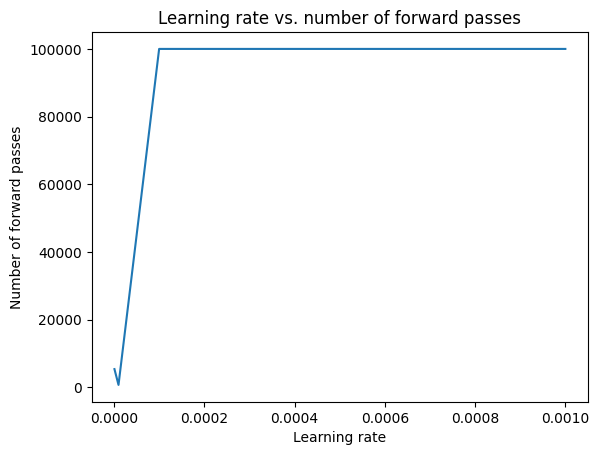

In [9]:
plt.plot(lr_fixed.loc["lr", :], lr_fixed.loc["forward_passes", :])
plt.title("Learning rate vs. number of forward passes")
plt.xlabel("Learning rate")
plt.ylabel("Number of forward passes")
plt.show()

For the combination of n = 10 and m = 4, our training converges for lr = 1e-6 but quicker for lr = 1e-5. For larger learning rates it does not converge any more after 10 epochs.

In [14]:
training_stats = []
# learning rate variable, n & m fixed
n_values = [5, 8, 16, 32, 64, 128, 256, 512, 1024]
lr = 0.000001
for n in n_values:
    network = SimplePerceptron(rng)
    x_train, y_train = generate_extended_training_set(rng, 10000, n, 4)
    network.train(x_train, y_train, lr, epochs, stopping_criteria)
    training_stats.append(pd.DataFrame.from_dict(network.training_stats, orient="index"))

n_tested = pd.concat(training_stats, axis=1)
# add a row with the n values
n_tested.loc["n", :] = n_values
n_tested

,0,0,0,0,0,0,0,0,0
epoch,0,0,0,0,0,0,0,3,9
loss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1924341695448299695536713893826229732534007421...
forward_passes,5475,5603,5293,5805,4809,7376,9737,33649,100000
lr,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
stopped_early,True,True,True,True,True,True,True,True,False
training_size,10000,10000,10000,10000,10000,10000,10000,10000,10000
n,5,8,16,32,64,128,256,512,1024


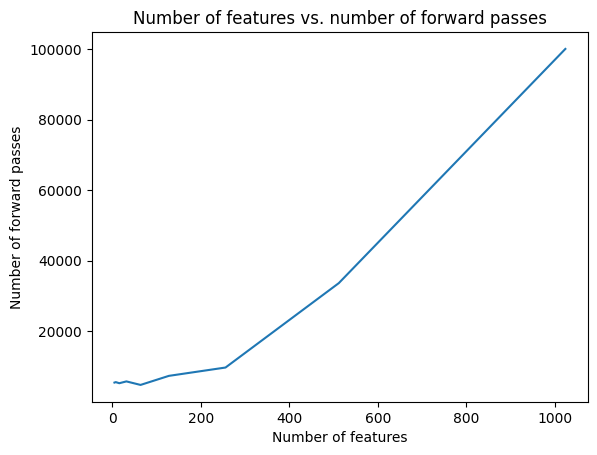

In [15]:
plt.plot(n_tested.loc["n", :], n_tested.loc["forward_passes", :])
plt.title("Number of features vs. number of forward passes")
plt.xlabel("Number of features")
plt.ylabel("Number of forward passes")
plt.show()

There seems to be a threshold for n where the convergence time rises really fast.

In [18]:
training_stats = []
# learning rate variable, n & m fixed
lr = 0.000001
n = 64
m_values = [2, 4, 8, 16, 32, 63]
for m in m_values:
    network = SimplePerceptron(rng)
    x_train, y_train = generate_extended_training_set(rng, 10000, n, m)
    network.train(x_train, y_train, lr, epochs, stopping_criteria)
    training_stats.append(pd.DataFrame.from_dict(network.training_stats, orient="index"))
m_tested = pd.concat(training_stats, axis=1)
m_tested.loc["m", :] = m_values
m_tested

,0,0,0,0,0,0
epoch,0,0,0,0,0,0
loss,0.0,0.0,0.0,0.0,0.0,0.0
forward_passes,6350,6473,5902,6549,6517,6725
lr,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
stopped_early,True,True,True,True,True,True
training_size,10000,10000,10000,10000,10000,10000
m,2,4,8,16,32,63


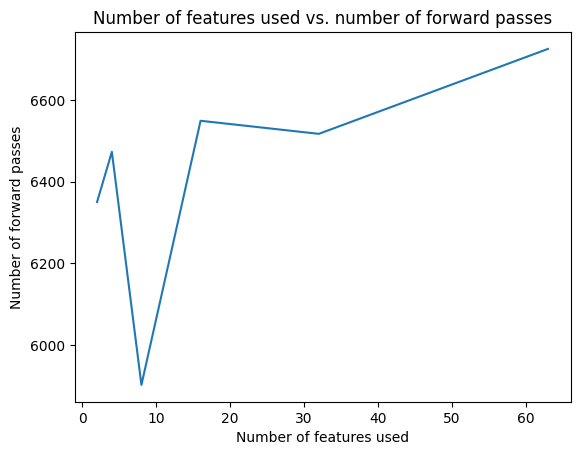

In [19]:
plt.plot(m_tested.loc["m", :], m_tested.loc["forward_passes", :])
plt.title("Number of features used vs. number of forward passes")
plt.xlabel("Number of features used")
plt.ylabel("Number of forward passes")
plt.show()

#### Create a dataset with different scalings for the $x_1, x_2 \dots x_m$

In [20]:
def generate_training_set_with_different_scaling(rng: np.random.Generator, size: int, n: int, m: int):
    noise = rng.normal(100, 1, size=(size, n - m))
    x = rng.integers(0, 1, size=(size, m))
    y = np.sum(x, axis=1)
    return np.array([x, noise]), y

x_train, y_train = generate_extended_training_set(rng, 100, 5, 4)

In [21]:
training_stats = []

learning_rates = [0.000001, 0.00001, 0.0001, 0.001]
# learning rate variable, n & m fixed
for lr in learning_rates:
    network = SimplePerceptron(rng)
    x_train, y_train = generate_extended_training_set(rng, 10000, 10, 4)
    network.train(x_train, y_train, lr, epochs, stopping_criteria)
    training_stats.append(pd.DataFrame.from_dict(network.training_stats, orient="index"))
    print(network.weights[-1])
lr_fixed = pd.concat(training_stats, axis=1)
lr_fixed

[ 1.00000000e+00  9.99999994e-01  9.99999995e-01  9.99999993e-01
 -5.39706692e-11  1.00855352e-10 -5.68190848e-09 -8.04072900e-09
  1.06516067e-08 -2.27909569e-09]
[ 1.00000000e+00  9.99999999e-01  9.99999999e-01  1.00000000e+00
  7.35673838e-10  1.67081787e-09  8.87513986e-10  1.30677950e-09
  1.19761408e-09 -2.68803967e-10]


C:\Users\rosen\AppData\Local\Temp\ipykernel_8872\716216365.py:9: RuntimeWarning: overflow encountered in scalar power
  return 1/2 * (y_hat - y) ** 2


[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]


,0,0,0,0
epoch,0,0,9,9
loss,0.0,0.0,NaN,NaN
forward_passes,5819,700,100000,100000
lr,0.000001,0.00001,0.0001,0.001
stopped_early,True,True,False,False
training_size,10000,10000,10000,10000


In [22]:
training_stats = []
# learning rate variable, n & m fixed
n_values = [5, 8, 16, 32, 64, 128, 256, 512, 1024]
lr = 0.000001
for n in n_values:
    network = SimplePerceptron(rng)
    x_train, y_train = generate_extended_training_set(rng, 10000, n, 4)
    network.train(x_train, y_train, lr, epochs, stopping_criteria)
    training_stats.append(pd.DataFrame.from_dict(network.training_stats, orient="index"))
    # print(network.weights[-1])
n_tested = pd.concat(training_stats, axis=1)
# add a row with the n values
n_tested.loc["n", :] = n_values
n_tested

,0,0,0,0,0,0,0,0,0
epoch,0,0,0,0,0,0,0,3,9
loss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2198731007001034633108576707467317075507372673...
forward_passes,4995,5134,4808,5901,5191,6561,9680,31630,100000
lr,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
stopped_early,True,True,True,True,True,True,True,True,False
training_size,10000,10000,10000,10000,10000,10000,10000,10000,10000
n,5,8,16,32,64,128,256,512,1024


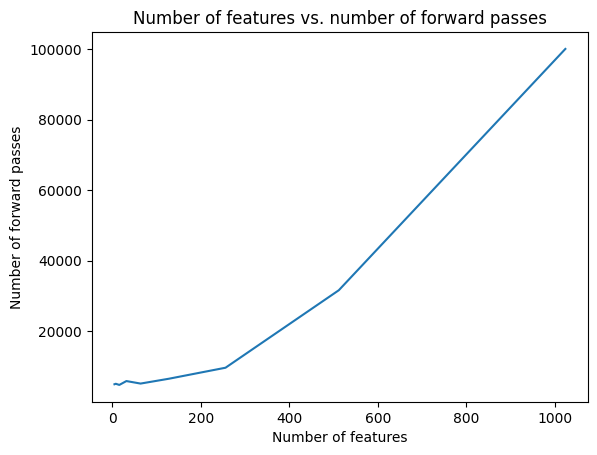

In [23]:
plt.plot(n_tested.loc["n", :], n_tested.loc["forward_passes", :])
plt.title("Number of features vs. number of forward passes")
plt.xlabel("Number of features")
plt.ylabel("Number of forward passes")
plt.show()

What would happen if I implemented a non linear activation function before the networks output?
- the model would be non linear
- maybe it would be harder to train (longer convergence time)
- it would be more flexible because it would not be constrained to a linear function approximation
- anything else I did not think of?